<a href="https://colab.research.google.com/github/hericax/Pos/blob/master/projeto_3/aed_projeto_3(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 2

# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

Questionamentos a serem investigados:

1 - As maiores média de votos está relacionada a algum genero específico?

2 - As maiores média de votos está relacionada a algum idioma original?

3 - As maiores média de votos está relacionada a algum cia de produção?

!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0

!apt-get install graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Execute esta linha para conferir que seu Google Drive está devidamente montado (deve aparecer a pasta 'drive')

%ls -la

total 61247
-rw------- 1 root root   139438 Oct 25 22:13 decision_tree.png
-rw------- 1 root root 28131092 Nov  5 21:24 filmes_df_limpo.csv
-rw------- 1 root root 34445126 Sep 21  2019 movies_metadata.csv


In [ ]:
%cd drive/My Drive/Pos IACD/projeto_3/base

[Errno 2] No such file or directory: 'drive/My Drive/Pos IACD/projeto_3/base'
/content/drive/My Drive/Pos IACD/projeto_3/base


In [ ]:
%ls

decision_tree.png  filmes_df_limpo.csv  movies_metadata.csv


In [ ]:

# IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn import preprocessing # normalização MIM-MAX

from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelBinarizer

from sklearn import utils
import time

import multiprocessing

import itertools
from PIL import Image # para exibir imagens salvas

In [ ]:
# lendo o arquivo localmente
df_final = pd.read_csv('filmes_df_limpo.csv')

In [ ]:
df_final.head(3)

,titulo,generos_ordenados,descricao,duracao,video,ano_lancamento,lingua,cod_lingua,qtde_votos,acao,aventura,animacao,comedia,crime,documentario,drama,familia,fantasia,estrangeiro,historia,horror,musical,misterio,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,Metro-Goldwyn-Mayer (MGM),Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,RKO Radio Pictures,Columbia Pictures,Mosfilm,Walt Disney Pictures,Universal International Pictures (UI),United States of America (pais producao),United Kingdom (pais producao),France (pais producao),Japan (pais producao),Italy (pais producao),Canada (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),English,Français,日本語,Italiano,Español,media_votos
0,Toy Story,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",81.0,False,1995,Inglês,1.0,5415.0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,7.7
1,Jumanji,"['Adventure', 'Family', 'Fantasy']",When siblings Judy and Peter discover an encha...,104.0,False,1995,Inglês,1.0,2413.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,6.9
2,Grumpier Old Men,"['Comedy', 'Romance']",A family wedding reignites the ancient feud be...,101.0,False,1995,Inglês,1.0,92.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6.5


In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

## Hipótese 1 - As maiores média de votos está relacionada a algum genero específico?



In [ ]:
df_final.dtypes

titulo                                       object
generos_ordenados                            object
descricao                                    object
duracao                                     float64
video                                          bool
ano_lancamento                                int64
lingua                                       object
cod_lingua                                  float64
qtde_votos                                  float64
acao                                           bool
aventura                                       bool
animacao                                       bool
comedia                                        bool
crime                                          bool
documentario                                   bool
drama                                          bool
familia                                        bool
fantasia                                       bool
estrangeiro                                    bool
historia    

Text(0, 0.5, 'Média Votos')

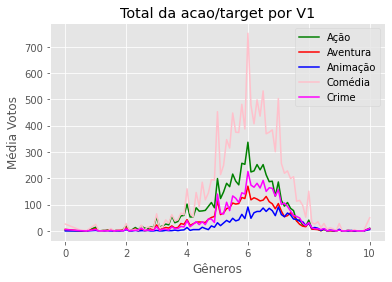

In [ ]:
# Como são várias as features de gênero, as dividi em grupo para facilitar a visualização
x = df_final.groupby(['media_votos']).sum()

x['acao'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ação')
x['aventura'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Aventura')
x['animacao'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Animação')
x['comedia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Comédia')
x['crime'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Crime')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que a comédia é o gênero com maior média de votos, seguido da ação

Text(0, 0.5, 'Média Votos')

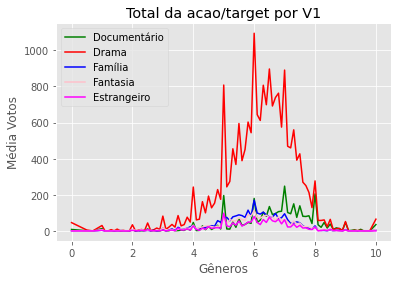

In [ ]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['documentario'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Documentário')
x['drama'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Drama')
x['familia'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Família')
x['fantasia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Fantasia')
x['estrangeiro'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Estrangeiro')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, estando os demais mais ou menos no memo nível

Text(0, 0.5, 'Média Votos')

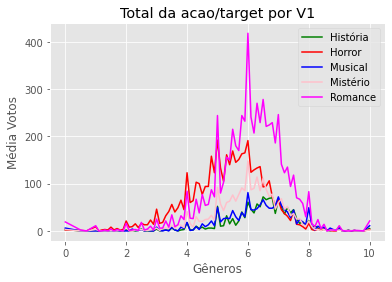

In [ ]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['historia'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='História')
x['horror'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Horror')
x['musical'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Musical')
x['misterio'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Mistério')
x['romance'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Romance')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o romance é o gênero com maior média de votos, segido do horror.

Text(0, 0.5, 'Média Votos')

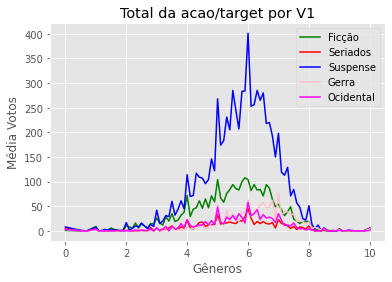

In [ ]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['ficcao_cientifica'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ficção')
x['filmes_tv'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Seriados')
x['suspense'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Suspense')
x['gerra'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Gerra')
x['ocidental'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Ocidental')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o suspense é o gênero com maior média de votos, seguido da ficção

Text(0, 0.5, 'Média Votos')

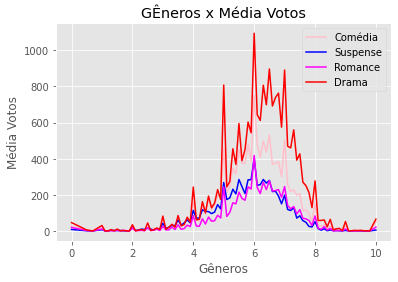

In [ ]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['comedia'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='Comédia')
x['suspense'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Suspense')
x['romance'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Romance')
x['drama'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Drama')

plt.legend()
plt.title('GÊneros x Média Votos')
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, seguido da comédia. Os demais estão parecidos.

Conforme observamos, o gênero que possui a maior média de votos é o Drama, seja isolado, seja em conjunto com outros gêneros. Dos 10 maiores, o Drama está presente em 6. 

## Hipótese 2 - As maiores média de votos está relacionada a algum idioma original?

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [ ]:
lingua = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
lingua

,media_votos
lingua,
Inglês,175428.2
Francês,14640.3
Japonês,8418.3
Italiano,8251.3
Espanhol,7795.5
Alemão,6277.7
Russo,4658.3
Hindi,2904.2
Coreano,2903.4


Text(0.5, 1.0, 'Lingua x média de votos')

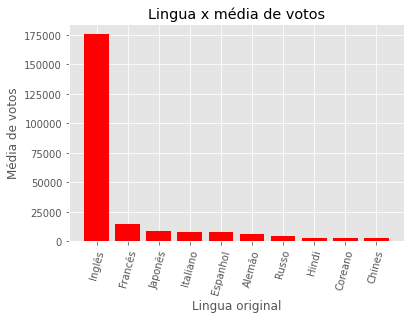

In [ ]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.lingua,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Lingua original")
plt.ylabel("Média de votos")
plt.title("Lingua x média de votos")

In [ ]:
total_ingles = len(df_final[df_final['lingua'] == "Inglês"])

outras_linguas = ['Francês', 'Chines', 'Italiano', 'Persa', 'Neerlandês',
       'Alemão', 'Mandarim padrão', 'Argentino', 'Espanhol', 'Russo',
       'Japonês', 'Coreano', 'Sérvio', 'Bengali', 'Hebraico', 'Português',
       'Wolof', 'Romeno', 'Húngaro', 'Galês', 'Vietnamita', 'hrv',
       'Dinamarquês', 'Norueguês', 'Bokmål norueguês', 'Polonês',
       'Grego, Moderno', 'Shan', 'No Language', 'Macedônio', 'Tibetano',
       'Catalão', 'Finlandês', 'Tailandês', 'Eslovaco', 'Bósnio', 'Hindi',
       'Turco', 'Islandês', 'Pachto', 'Abecásio', 'Esperanto',
       'Georgiano', 'Mongol', 'Bambara', 'Zulu', 'Ucraniano', 'Africâner',
       'Latim', 'Estoniano', 'Curdo', 'Letão', 'Tâmil', 'Esloveno',
       'Tagalog', 'Urdu', 'Kinyarwanda', 'Indonésio', 'Búlgaro',
       'Marathi (Marāṭhī)', 'Lituano', 'Cazaque', 'Malaio', 'Albanês',
       'Quechua', 'Telugu', 'Amárico', 'Javanês', 'Tajique', 'Malayalam',
       'Croata', 'Lao', 'Aymará', 'Canarês', 'Nepali', 'Panjabi, Punjabi',
       'Galego', 'Quirguiz, Kyrgyz', 'Samoano', 'Basco', 'Tcheco',
       'Armênio', 'Inuktitut', 'Sinhala, Cingalês']
total_outras = 0
for i in outras_linguas:
    total_outras = total_outras + len(df_final[df_final['lingua'] == i])

total_linguas = total_outras + total_ingles

In [ ]:
print ('total_outras=',total_outras, 'total_ingles=', total_ingles, '\n Total linguas', total_linguas, '\n diferença ingles - outras= ', total_ingles - total_outras, '\n registros dataset=', len(df_final.lingua))

total_outras= 12316 total_ingles= 29795 
 Total linguas 42111 
 diferença ingles - outras=  17479 
 registros dataset= 42111


In [ ]:
print ("Ingles=", (total_ingles/total_linguas)*100)
print ("Outras=", (total_outras/total_linguas)*100)

Ingles= 70.75348483769086
Outras= 29.246515162309134


Percebe-se acima que mesmo somando todas as outras linguas originais dos filmes, o inglês é o maior idioma, com 70%. 

## Hipótese 3 - As maiores média de votos está relacionada a algum cia de produção?

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [ ]:
print ('MGM', len(df_final[df_final['Metro-Goldwyn-Mayer (MGM)'] == True]))
print ('Warner', len(df_final[df_final['Warner Bros.'] == True]))
print ('Paramount', len(df_final[df_final['Paramount Pictures'] == True]))
print ('Fox', len(df_final[df_final['Twentieth Century Fox Film Corporation'] == True]))
print ('Universal', len(df_final[df_final['Universal Pictures'] == True]))
print ('RKO', len(df_final[df_final['RKO Radio Pictures'] == True]))
print ('Columbia', len(df_final[df_final['Columbia Pictures'] == True]))
print ('Mosfilm', len(df_final[df_final['Mosfilm'] == True]))
print ('Walt Disney', len(df_final[df_final['Walt Disney Pictures'] == True]))
print ('Universal International Pictures (UI)', len(df_final[df_final['Universal International Pictures (UI)'] == True]))

MGM 990
Warner 1186
Paramount 968
Fox 812
Universal 817
RKO 259
Columbia 419
Mosfilm 183
Walt Disney 261
Universal International Pictures (UI) 94


Text(0, 0.5, 'Média Votos')

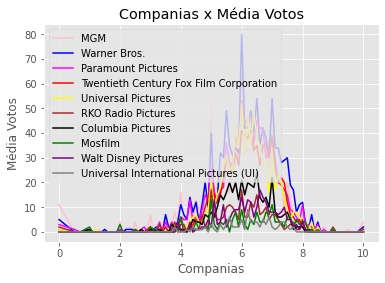

In [ ]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'line',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'line',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'line',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'line',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'line',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'line',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')

plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

Text(0, 0.5, 'Média Votos')

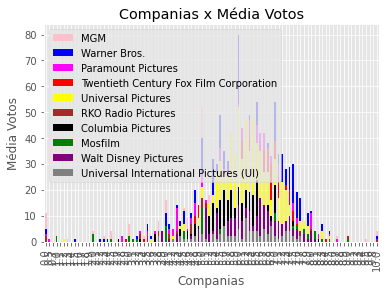

In [ ]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()


x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'bar',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'bar',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'bar',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'bar',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'bar',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'bar',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'bar',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'bar',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'bar',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'bar',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')


plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

Percebe-se que a companhia com as maiores médias de votos é a Warner

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

Será criado um modelo de regrassão para prever a média de votos dos filmes.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


### DISCRETIZAÇÃO DA FEATURE DURACAO

In [ ]:
# verificando a correlação da duração com a média de votos
corr_ini_duracao = df_final['duracao'].corr(df_final['media_votos'])
print ('duração x media_votos',corr_ini_duracao)

duração x media_votos 0.10521596532115966


In [ ]:
df_final.duracao.dtype

dtype('float64')

In [ ]:
# Vou tentar criar grupos para definir a feture e verificar se há melhora na correlação
intervals = pd.qcut(df_final['duracao'], 2).astype(str).unique()
intervals

array(['(0.999, 95.0]', '(95.0, 1256.0]'], dtype=object)

In [ ]:
df_final['tipo_duracao'] = pd.qcut(df_final['duracao'], 2).astype(str).map( {
                            intervals[0]: 'media',
                            intervals[1]: 'longa'
                            } ).astype(str)
df_final[['duracao','tipo_duracao']]

,duracao,tipo_duracao
0,81.0,media
1,104.0,longa
2,101.0,longa
3,127.0,longa
4,106.0,longa
...,...,...
42106,30.0,media
42107,85.0,media
42108,104.0,longa
42109,360.0,longa


Text(0.5, 1.0, 'Tipo de duração x média de votos')

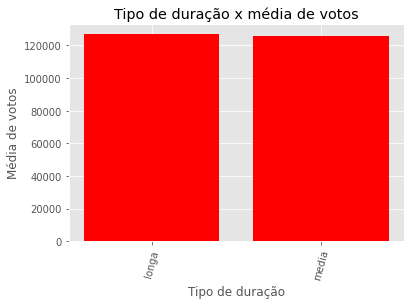

In [ ]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['tipo_duracao','media_votos']].groupby('tipo_duracao').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.tipo_duracao,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Tipo de duração")
plt.ylabel("Média de votos")
plt.title("Tipo de duração x média de votos")

In [ ]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['tipo_duracao'].map({
'media': 0, 
'longa': 1})

In [ ]:
# verificando a correlação da duração com a média de votos
corr_fim_duracao = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Tipo duração x media_votos',corr_fim_duracao)

Tipo duração x media_votos 0.15483363835157488


In [ ]:
print ('Final', corr_fim_duracao, ' | inicial', corr_ini_duracao)

Final 0.15483363835157488  | inicial 0.10521596532115966


Fiz o teste da correlação para os valores de 2 a 5 grupos. Quanto maior a qtde de grupos, pior a correlação.
Nova feature mantida pois houve uma pequena melhora na correlação.

### DISCRETIZAÇÃO DA FEATURE ANO_LANCAMENTO

In [ ]:
# verificando a correlação da duração com a média de votos
corr_ini_anoLancamento = df_final['ano_lancamento'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_ini_anoLancamento)

Ano lançamento x media_votos -0.030914166602693544


In [ ]:
# tentar criar períodos para melhor a correlação
# avaliando a quantidade de períodos a serem criados 
intervals = pd.qcut(df_final['ano_lancamento'], 10).astype(str).unique()
intervals

array(['(1985.0, 1995.0]', '(1995.0, 2001.0]', '(1972.0, 1985.0]',
       '(1955.0, 1972.0]', '(1873.999, 1955.0]', '(2009.0, 2012.0]',
       '(2012.0, 2014.0]', '(2001.0, 2006.0]', '(2006.0, 2009.0]',
       '(2014.0, 2017.0]'], dtype=object)

In [ ]:
# criando os perídos para definir o ano de lançamento dos filmes
df_final['periodo'] = pd.qcut(df_final['ano_lancamento'], 10).astype(str).map({intervals[0]: '1993 a 2000',
        intervals[1]: '1970 a 1982',
        intervals[2]: '1982 a 1993',
        intervals[3]: '1952 a 1970',
        intervals[4]: '1873 a 1952',
        intervals[5]: '2000 a 2005',
        intervals[6]: '2009 a 2012',
        intervals[7]: '2012 a 2014',
        intervals[8]: '2005 a 2009',
        intervals[9]: '2014 a 2020'} ).astype(str)

df_final[['ano_lancamento','periodo']]

,ano_lancamento,periodo
0,1995,1993 a 2000
1,1995,1993 a 2000
2,1995,1993 a 2000
3,1995,1993 a 2000
4,1995,1993 a 2000
...,...,...
42106,2000,1970 a 1982
42107,1995,1993 a 2000
42108,1991,1993 a 2000
42109,2011,2000 a 2005


Text(0.5, 1.0, 'Período x média de votos')

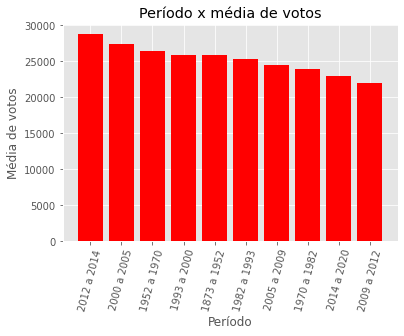

In [ ]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['periodo','media_votos']].groupby('periodo').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.periodo,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Período")
plt.ylabel("Média de votos")
plt.title("Período x média de votos")

In [ ]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['periodo'].map({
    '1993 a 2000': 0,
    '1970 a 1982': 1,
    '1982 a 1993': 2,
    '1952 a 1970': 3,
    '1873 a 1952': 4,
    '2000 a 2005': 5,
    '2009 a 2012': 6,
    '2012 a 2014': 7,
    '2005 a 2009': 8,
    '2014 a 2020': 9
})

In [ ]:
# verificando a correlação da duração com a média de votos
corr_fim_anoLancamento = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_fim_anoLancamento)

Ano lançamento x media_votos 0.004196023041806103


In [ ]:
print (" final= ", corr_fim_anoLancamento, "| inicial = ",corr_ini_anoLancamento)

 final=  0.004196023041806103 | inicial =  -0.030914166602693544


In [ ]:
# Houve melhora então a nova feature será mantida

### FAZER A CORRELAÇÃO DAS FEATURES A SEREM TRABALHADAS

In [ ]:
# verificando a correlação dos generos

print ('acao x media_votos',df_final['acao'].corr(df_final['media_votos']))
print ('aventura x media_votos',df_final['aventura'].corr(df_final['media_votos']))
print ('animacao x media_votos',df_final['animacao'].corr(df_final['media_votos']))
print ('comedia x media_votos',df_final['comedia'].corr(df_final['media_votos']))
print ('crime x media_votos',df_final['crime'].corr(df_final['media_votos']))
print ('documentario x media_votos',df_final['documentario'].corr(df_final['media_votos']))
print ('drama x media_votos',df_final['drama'].corr(df_final['media_votos']))
print ('familia x media_votos',df_final['familia'].corr(df_final['media_votos']))
print ('fantasia x media_votos',df_final['fantasia'].corr(df_final['media_votos']))
print ('estrangeiro x media_votos',df_final['estrangeiro'].corr(df_final['media_votos']))
print ('historia x media_votos',df_final['historia'].corr(df_final['media_votos']))
print ('horror x media_votos',df_final['horror'].corr(df_final['media_votos']))
print ('musical x media_votos',df_final['musical'].corr(df_final['media_votos']))
print ('misterio x media_votos',df_final['misterio'].corr(df_final['media_votos']))
print ('romance x media_votos',df_final['romance'].corr(df_final['media_votos']))
print ('ficcao_cientifica x media_votos',df_final['ficcao_cientifica'].corr(df_final['media_votos']))
print ('filmes_tv x media_votos',df_final['filmes_tv'].corr(df_final['media_votos']))
print ('suspense x media_votos',df_final['suspense'].corr(df_final['media_votos']))
print ('gerra x media_votos',df_final['gerra'].corr(df_final['media_votos']))
print ('ocidental x media_votos',df_final['ocidental'].corr(df_final['media_votos']))

acao x media_votos -0.08289026991958129
aventura x media_votos -0.02794159637963377
animacao x media_votos 0.0746324060560334
comedia x media_votos -0.017782075432232047
crime x media_votos 0.02491711306436696
documentario x media_votos 0.15044245555978217
drama x media_votos 0.1220509184563153
familia x media_votos -0.013866659798187563
fantasia x media_votos -0.013615448225225825
estrangeiro x media_votos -0.004523470611788797
historia x media_votos 0.057966541022029916
horror x media_votos -0.18819159408147684
musical x media_votos 0.04891898096277814
misterio x media_votos -0.008024703581022145
romance x media_votos 0.011018217859676422
ficcao_cientifica x media_votos -0.11295899314774639
filmes_tv x media_votos -0.03709269978090581
suspense x media_votos -0.09543228084790209
gerra x media_votos 0.03892514555383787
ocidental x media_votos -0.03503105661478577


In [ ]:
#Excluir as features com correlação negativa
'''acao x media_votos -0.08289026991958133
aventura x media_votos -0.02794159637963377
comedia x media_votos -0.01778207543223205
familia x media_votos -0.01386665979818757
fantasia x media_votos -0.013615448225225833
estrangeiro x media_votos -0.0045234706117887975
horror x media_votos -0.18819159408147684
misterio x media_votos -0.008024703581022141
ficcao_cientifica x media_votos -0.11295899314774636
filmes_tv x media_votos -0.03709269978090582
suspense x media_votos -0.09543228084790208
ocidental x media_votos -0.03503105661478576'''

df_final.drop(['acao','aventura','comedia', 'familia', 'fantasia', 'estrangeiro', 'horror', 'misterio',
    'ficcao_cientifica', 'filmes_tv', 'suspense', 'ocidental'], axis = 1, inplace = True)

In [ ]:
print ('video x media_votos',df_final['video'].corr(df_final['media_votos']))

video x media_votos -0.006780320444616408


In [ ]:
# remoção da feature video
df_final.drop(['video'], axis = 1, inplace = True)

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais producao)', 'English', 'Français', '日本語', 'Italiano',
       'Español', 'media_votos', 'tipo_duracao', 'periodo'],
      dtype='object')

In [ ]:
# features de companhias de produção
''''Metro-Goldwyn-Mayer (MGM)','Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)'
       '''

print ('MGV',df_final['Metro-Goldwyn-Mayer (MGM)'].corr(df_final['media_votos']))
print ('Warner Bros. x media_votos',df_final['Warner Bros.'].corr(df_final['media_votos']))
print ('Paramount x media_votos',df_final['Paramount Pictures'].corr(df_final['media_votos']))
print ('Fox x media_votos',df_final['Twentieth Century Fox Film Corporation'].corr(df_final['media_votos']))
print ('Universal Pictures x media_votos',df_final['Universal Pictures'].corr(df_final['media_votos']))
print ('RKO Radio Pictures x media_votos',df_final['RKO Radio Pictures'].corr(df_final['media_votos']))
print ('Columbia Pictures x media_votos',df_final['Columbia Pictures'].corr(df_final['media_votos']))
print ('Mosfilm x media_votos',df_final['Mosfilm'].corr(df_final['media_votos']))
print ('Walt Disney Pictures x media_votos',df_final['Walt Disney Pictures'].corr(df_final['media_votos']))
print ('Universal International Pictures (UI) x media_votos',df_final['Universal International Pictures (UI)'].corr(df_final['media_votos']))

MGV -0.005643144906661706
Warner Bros. x media_votos 0.01930136964569854
Paramount x media_votos 0.013957583811027295
Fox x media_votos 0.020341785213981084
Universal Pictures x media_votos 0.01823466714177931
RKO Radio Pictures x media_votos -0.005677699693419887
Columbia Pictures x media_votos 0.0024513997944629476
Mosfilm x media_votos 0.005155744715740199
Walt Disney Pictures x media_votos 0.017480801711270585
Universal International Pictures (UI) x media_votos 0.006105733010344676


In [ ]:
# excluido das features com correlação negativa
'''
MGV -0.005643144906661703
RKO Radio Pictures x media_votos -0.005677699693419887

'''

df_final.drop(['Metro-Goldwyn-Mayer (MGM)','RKO Radio Pictures'], axis = 1, inplace = True)

In [ ]:
# features de paizes onde os filmes foram produzidos
'''
'United States of America', 'United Kingdom', 'France', 'Japan',
       'Italy', 'Canada', 'Canada.1', 'Canada.2', 'Canada.3', 'Germany',
       'Russia', 'India', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'English', 'Français', '日本語', 'Italiano', 'Español'
    '''
print ('United States of America',df_final['United States of America (pais producao)'].corr(df_final['media_votos']))
print ('United Kingdom x media_votos',df_final['United Kingdom (pais producao)'].corr(df_final['media_votos']))
print ('France x media_votos',df_final['France (pais producao)'].corr(df_final['media_votos']))
print ('Japan x media_votos',df_final['Japan (pais producao)'].corr(df_final['media_votos']))
print ('Italy x media_votos',df_final['Italy (pais producao)'].corr(df_final['media_votos']))
print ('Canada x media_votos',df_final['Canada (pais producao)'].corr(df_final['media_votos']))


United States of America -0.10648717484568725
United Kingdom x media_votos 0.05259387167117542
France x media_votos 0.07102889874470662
Japan x media_votos 0.07031332540118465
Italy x media_votos 0.020547268018409823
Canada x media_votos -0.04293418732490301


In [ ]:
# remoção das features com correlação negativa
'''
United States of America -0.10648717484568719
Canada x media_votos -0.04293418732490301
'''

df_final.drop(['United States of America (pais producao)','Canada (pais producao)'], axis = 1, inplace = True)

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'English',
       'Français', '日本語', 'Italiano', 'Español', 'media_votos', 'tipo_duracao',
       'periodo'],
      dtype='object')

In [ ]:
# correlação dos idimos de tradução
''' 'English', 'Français', '日本語', 'Italiano', 'Español' '''

print ('English x media_votos',df_final['English'].corr(df_final['media_votos']))
print ('Français x media_votos',df_final['Français'].corr(df_final['media_votos']))
print ('日本語 x media_votos',df_final['日本語'].corr(df_final['media_votos']))
print ('Italiano x media_votos',df_final['Italiano'].corr(df_final['media_votos']))
print ('Español x media_votos',df_final['Español'].corr(df_final['media_votos']))

English x media_votos -0.11048853817921579
Français x media_votos 0.05660434292842857
日本語 x media_votos 0.07409012325949083
Italiano x media_votos 0.021569352414188604
Español x media_votos 0.027626715546068107


In [ ]:
# remoção das features com correlação negativa
'''
English x media_votos -0.1104885381792159
'''

df_final.drop(['English'], axis = 1, inplace = True)

## AVALIANDO A CORRELAÇÃO DE TODAS AS FEATURES

Não consegui melhorar muito a correlação das features, mas optei por manter todas as informadas no código abaixo.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text

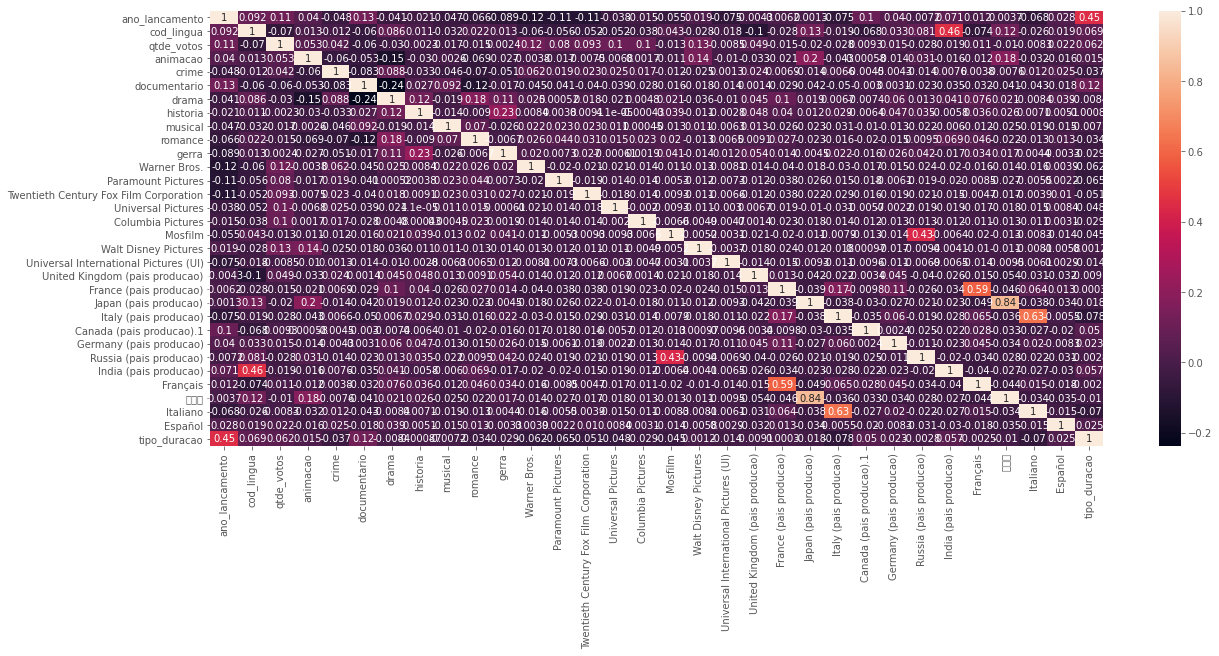

In [ ]:
corr = df_final[['ano_lancamento', 'cod_lingua', 'qtde_votos', 
       'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao']].corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.figure(figsize=(20,8))
plt.figure(figsize=[20,8])
sns.heatmap(corr,annot=True)

In [ ]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'media_votos', 'tipo_duracao', 'periodo',
       'target'],
      dtype='object')

## SELECIONANDO AS FEATURES

In [ ]:
#Selecionando as features que serão utilizadas para redução da dimensionalidade e normalização 
X = df_final[[ 
    'ano_lancamento', 'cod_lingua', 'qtde_votos', 
       'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'
       ]]
       
y = df_final['media_votos'].round(0)

In [ ]:
y = y.astype(int)

In [ ]:
# target desbalanceados
y.value_counts()

6     15532
7     10145
5      7267
8      3782
4      3461
3       811
2       403
9       288
10      200
1       122
0       100
Name: media_votos, dtype: int64

In [ ]:
# guardando o rótulo das colunas
cols = X.columns

## NORMALIZAÇÃO DOS DADOS

NORMALIZAÇÃO MIM-MAX

In [ ]:
# A normalização é feita feature a feature e o objeto é colocar as variáveis dentro do intervalo de 0 e 1
min_max_scaler = preprocessing.MinMaxScaler() #dimensiona e traduz cada recurso individualmente, de modo que esteja no intervalo especificado no conjunto de treinamento (entre zero e um)
x_scaled = min_max_scaler.fit_transform(X)
df_normalizado_MIMMAX = pd.DataFrame(x_scaled)

# renomeando as colunas
df_normalizado_MIMMAX.set_axis(cols, axis='columns', inplace=True)

df_normalizado_MIMMAX.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,gerra,Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Columbia Pictures,Mosfilm,Walt Disney Pictures,Universal International Pictures (UI),United Kingdom (pais producao),France (pais producao),Japan (pais producao),Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,0.846154,0.0,0.384681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.846154,0.0,0.171380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.846154,0.0,0.006466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_normalizado_MIMMAX.shape


(42111, 32)

In [ ]:
# visualizando o qtde de registros por classe/target
y.value_counts()

6     15532
7     10145
5      7267
8      3782
4      3461
3       811
2       403
9       288
10      200
1       122
0       100
Name: media_votos, dtype: int64

3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


No trabalho será utilizado o desvio padrão juntamente com a média. Esta métrica foi escolhida pois os valores alvo são médias, ou seja, o target é a média de votos que cada filme recebeu.

O desvio padrão, que serve para dizer o quanto os valores dos quais se extraiu a média são próximos ou distantes da própria média. Assim, quando se calcula o desvio padrão juntamente com a média de diferentes grupos, obtém-se mais informações para avaliar e diferenciar seus comportamentos. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados, ou seja, quanto mais próximo de zero, melhor.

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


In [ ]:
# semente aleatória a ser utilizada em tydi
RANDOM_STATE = 1 #semente aleatória
test_size = 0.35 # 35% será amostra de teste

Divisão dos dados - normalização MIM_MAx

In [ ]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_MIMMAX, X_test_MIMMAX, y_train_MIMMAX, y_test_MIMMAX = train_test_split(df_normalizado_MIMMAX, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [ ]:
print ('Quantidade de registros \n')
print('Dados de treino: X =', X_train_MIMMAX.shape,'y=', y_train_MIMMAX.shape,'\n','Dados de teste: X= ', X_test_MIMMAX.shape,'y=', y_test_MIMMAX.shape )

Quantidade de registros 

Dados de treino: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


In [ ]:
y_test_MIMMAX

5186     6
34298    2
33270    6
31452    6
40957    6
        ..
5891     6
1906     7
7540     6
30081    7
37153    5
Name: media_votos, Length: 14739, dtype: int64

Divisão dos dados - normalização Z-SCORE

5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


# DEFININDO AS FUNÇÕES QUE SERÃO UTILIZADAS PARA RODAR OS MODELOS, PLOTAR A MATRIZ DE CONFUSÃO E ARMAZENAR AS MÉTRICAS COLETADAS

In [ ]:
# criando do dataframe para armazenar as métricas coletadas a cada execução do modelo
columns = ['nome_modelo', 'tipo_predicao', 'desvio', 'media', 'F1_score', 'accuracia', 'precisao', 'revogacao'] 
''''
# NOME_MODELO: 'DECISON TREE REGRESSOR', 'RANDOM FOREST REGRESSOR'
# TIPO_PREDICAO: BASELINE, CV + GRIDCV
'''

# return desvio_y_test, media_y_test, F1_score, acuracia, precisao, revocacao

metricas = pd.DataFrame(columns=columns)

# função para inserir registro no dataframe
def insert(df, row):
    insert_loc = df.index.max()

    if np.isnan(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

In [ ]:
# FUNÇÃO PARA RODAR O MODELO
def roda_modelo (tipo, nome_modelo, X_train, y_train, X_test, y_test, modelo):
    modelo.fit(X_train, y_train) # TREINANDO A ARVORE COM OS DADOS DE TREINO
    y_pred = modelo.predict(X_test) # predizendo o target
    
    print ("{} do {}".format(tipo, nome_modelo))
    print ("\n")

    classes = [0,1,2,3,4,5,6,7,8,9,10]
    resultados = mostra_resultados(y_test, y_pred, classes,tipo, nome_modelo)
    
    #plotar_curva_roc(y_test, pd.DataFrame (y_pred))
    #print ('y_test', y_test)
    #print ('y_pred', pd.DataFrame (y_pred.astype(int)))

    return resultados, modelo

# Função para plotar o valor predito x valor real
def plotar_curva_roc(y_test, y_pred, average = "macro"):
  lb = LabelBinarizer () # binarizando os dados para poder plotar - multiclass
  lb.fit (y_test.astype(int))
  y_test = lb.transform (y_test.astype(int)) 
  y_pred = lb.transform (y_pred.astype(int))

  plt.rcParams['figure.figsize'] = [12, 5]

  fpr, tpr, _ = roc_curve(y_test,  y_pred)
  plt.plot(fpr, tpr, label='XGBC, auc='+str(auc), color='black')

  fpr, tpr, _ = roc_curve(y_test,  y_pred_et)
  plt.plot(fpr, tpr, label='ET, auc='+str(auc_et), color='green')

  plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--', label='Baseline')

  plt.legend(loc=4)
  plt.title('AUC', y=1.03, size=14, loc='left', x=-0.055)
  plt.ylabel('True Positive Rate', horizontalalignment='left', y=0.63)
  plt.xlabel('False Positive rate', horizontalalignment='right', x=0.195)
  plt.show()


# FUNÇÃO PARA PLOTAR A MATRIZ DE CONFUSÃO
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

# FUNÇÃO PARA MOSTRA RESULTADOS OBTIDOS NO MODELO
def mostra_resultados(y, y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.coolwarm):

    # Calcular os resultados
    cm = confusion_matrix(y, y_pred.round(0))
    #cm = confusion_matrix(y, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Falso Positivos - aqueles que não eram de determinada classe e foram classificados como se fossem dela
    FN = cm.sum(axis=1) - np.diag(cm)  # Falso Negativos - aqueles que não eram de determinada classe e foram classificados como se fossem dela
    TP = np.diag(cm)                   # Verdadeiro Positivo - são aquele que são de determinada classe e foram classificados corretamente nela
    TN = cm.sum() - (FP + FN + TP)     # Verdadeiro Negativos - são aqueles que não eram de determinada classe e não foram classificados nesta classe
    TPR = TP / (TP + FN)  # Revocação 
    PPV = TP / (TP + FP)  # Precisao - traz a informação de quantas observações o modelo classificou corretamente
    F1 = 2 * ((PPV * TPR) / (PPV + TPR)) # F1 Score
    ACC = (TP + TN) / (TP + FP + FN + TN)  # Acurácia - é a média global do acerto do modelo ao classificar as classes

    '''    
    # Exibe resultados
    print("    Verdadeiros Positivos:{}".format(TP))
    print("    Verdadeiros Negativos:{}".format(TN))
    print("    Falso Positivo:{}".format(FP))
    print("    Falso Negativo:{}".format(FN))
    print("\n\n")
    print("    Revocação:{}".format(TPR))    
    print("    Precisao:{}".format(PPV))
    print("    F1 Score:{}".format(F1.round(4)))
    print("    \nAcuracia:{}".format(ACC.round(4)*100))
    print("    \n Desvio \n")
    print("    y_tes:{}".format(desvio_y_test))
    print("    y_pred:{}".format(desvio_y_pred))
    print("    \n Média \n")
    print("    y_tes:{}".format(media_y_test))
    print("    y_pred:{}".format(media_y_prev))

    '''

    # desvio médio
    desvio_y = y_pred.std()

    # média
    media_y = y_pred.mean()
    F1_score = F1.mean()
    acuracia = ACC.mean()
    precisao = PPV.mean()
    revocacao = TPR.mean() 
    print("\n\n") 

    print ('desvio:', desvio_y, 'média:', media_y, '\nF1:', F1_score, 'Acurácia:', acuracia, '\nPrecisão:', precisao, 'Revocação: ', revocacao)
    print("\n\n") 
    
    plot_confusion_matrix(cm, classes)

    return desvio_y, media_y, F1_score, acuracia, precisao, revocacao, y_pred

# MODELO 1 - DECISION TREE

In [ ]:
# CRIAÇÃO DO MODELO COM PARÂMETROS PADRÃO
dec_clf = DecisionTreeRegressor(random_state=RANDOM_STATE)
dec_clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

BASELINE DECISON TREE do MIM-MAX





desvio: 1.2487901199385687 média: 5.960995134726615 
F1: nan Acurácia: 0.8764070585768123 
Precisão: 0.17871776369609652 Revocação:  0.17005896874407853



Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide


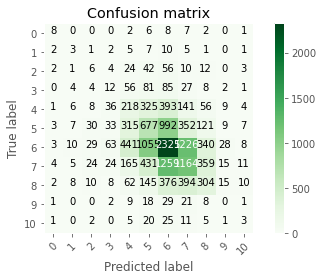

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_tree = roda_modelo('BASELINE DECISON TREE', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, dec_clf)

# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'BASELINE', resultados_MIMMAX_tree[0][0],resultados_MIMMAX_tree[0][1], resultados_MIMMAX_tree[0][2], resultados_MIMMAX_tree[0][3],resultados_MIMMAX_tree[0][4],resultados_MIMMAX_tree[0][5]])
columns = ['nome_modelo', 'tipo_predicao', 'F1_score', 'mean', 'std', 'accuracy', 'revogacao', 'precisao'] 

In [ ]:
# imprimindo a importância da feature
# Quanto maior o percentual, maior a importância
features_tree = X_train_MIMMAX.columns
features_importance = zip(resultados_MIMMAX_tree[1].feature_importances_, features_tree)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (features_tree, importance*100))

Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'],
      dtype='object'): 27.099110%
Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbi

In [ ]:
metricas

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
0,DECISION TREE REGRESSOR,BASELINE,1.24879,5.960995,NaN,0.876407,0.178718,0.170059


In [ ]:
# conforme observado o modelo com o menor desvio foi o DECISION TREE REGRESSOR com a normalização MIM-MAX
print ("Modelo com menor desvio", min(metricas.desvio))

Modelo com menor desvio 1.2487901199385687


## Plotando a árvore

In [ ]:
# como a árvore é muito grande e demorada para ser impressa, foi armazena em uma imagem e o código comentado
'''
classes = [0,1,2,3,4,5,6,7,8,9,10]
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(dec_clf, 
                   feature_names=X_train_MIMMAX.columns,  
                   class_names=classes,
                   filled=True)

# salvando a imagem resultande
fig.savefig("decision_tree.png")
'''

'\nclasses = [0,1,2,3,4,5,6,7,8,9,10]\nfig = plt.figure(figsize=(25,20)) \n_ = tree.plot_tree(dec_clf, \n                   feature_names=X_train_MIMMAX.columns,  \n                   class_names=classes,\n                   filled=True)\n\n# salvando a imagem resultande\nfig.savefig("decision_tree.png")\n'

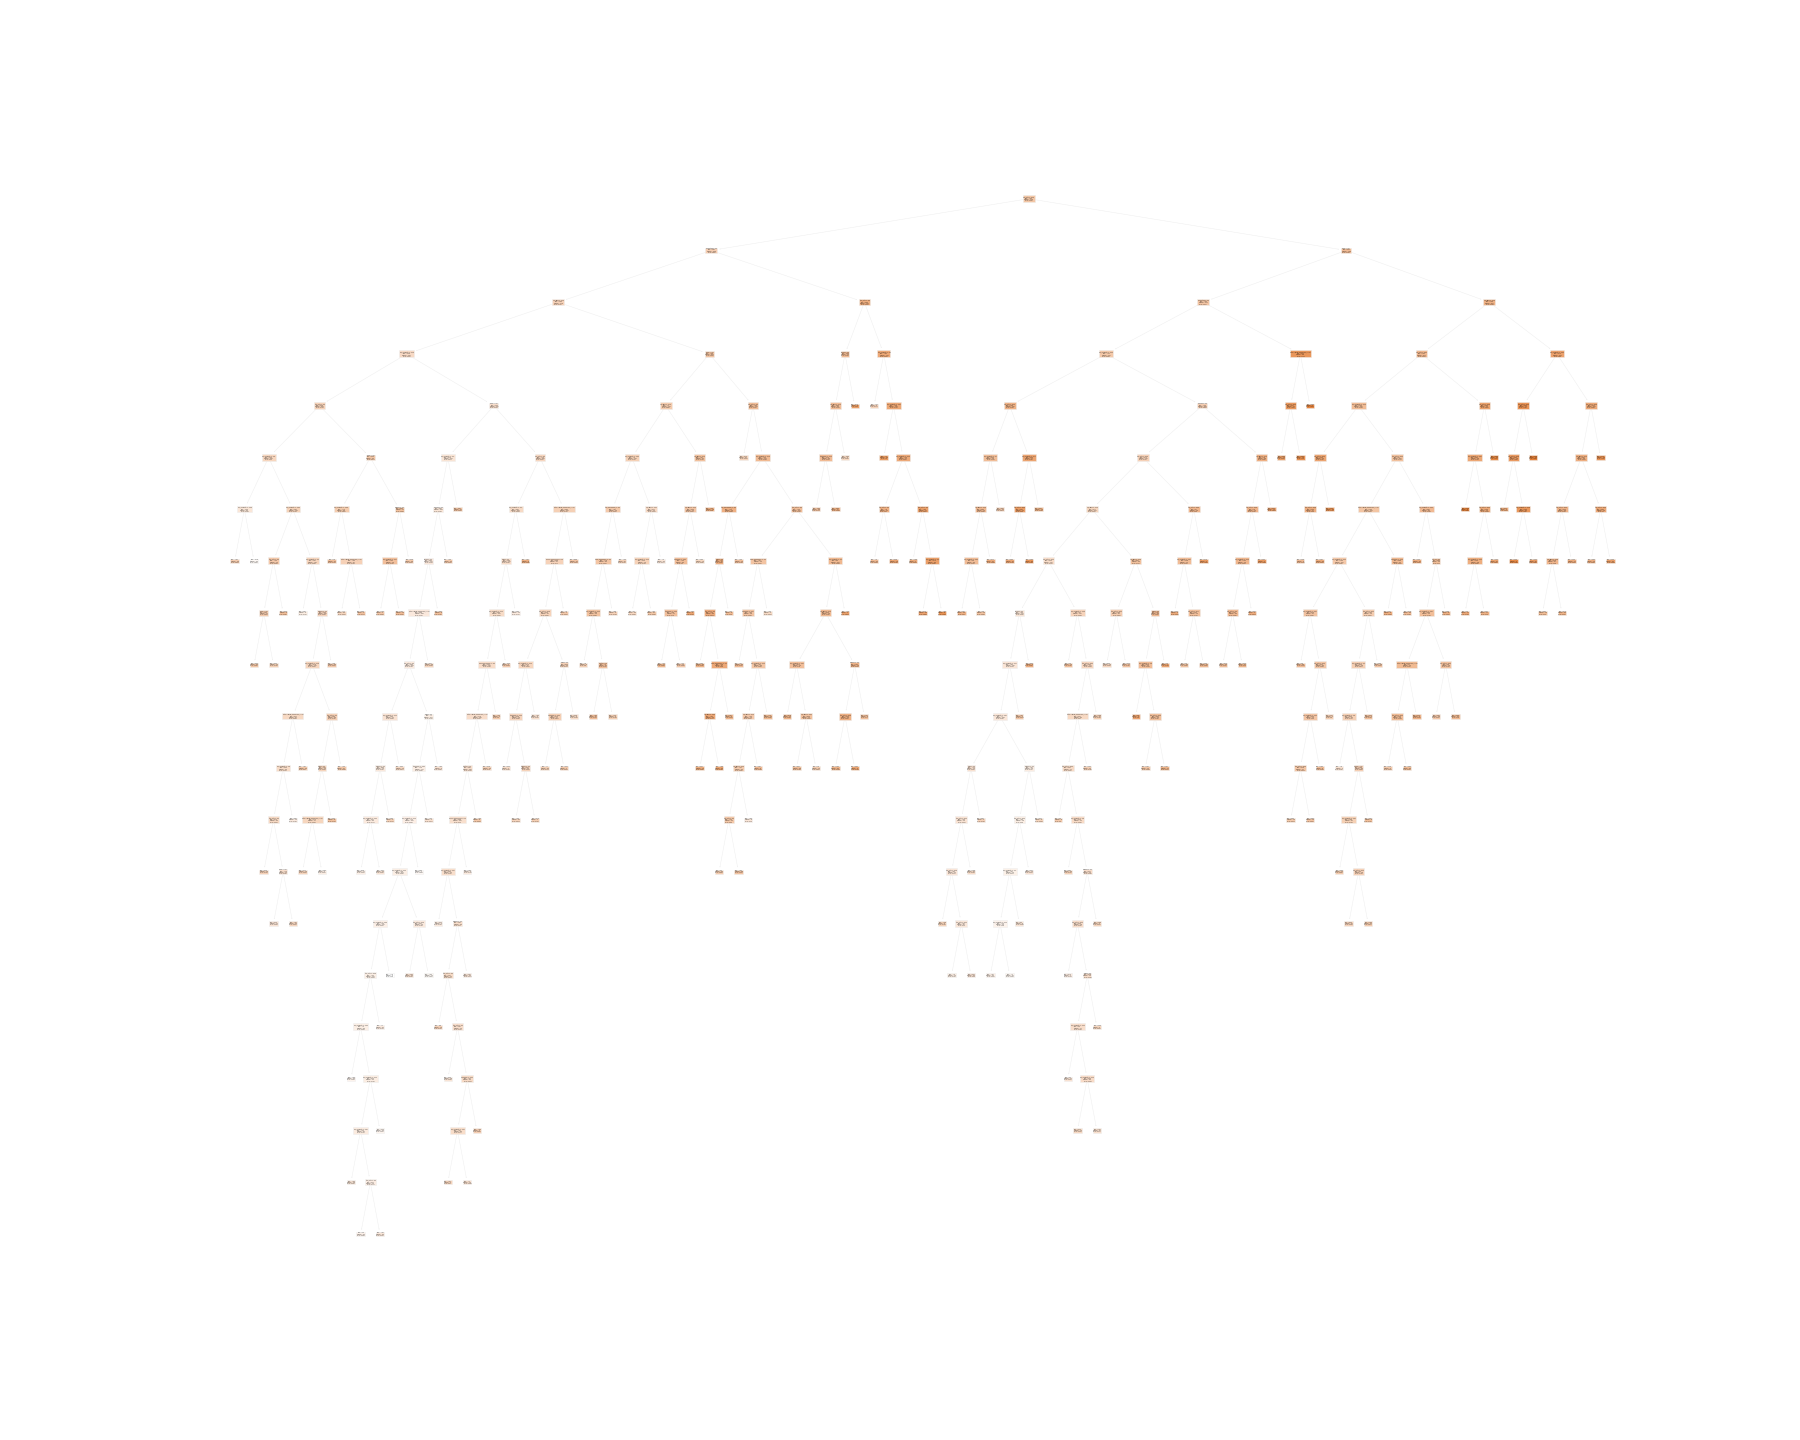

In [ ]:
# Carregando uma imagem da árvore
nome_imagem = "decision_tree.png"

img = Image.open(nome_imagem)

# exibindo a imagem
display(img)

## Utilizando cross-validation e GridSearchCV para melhorar os modelos

In [ ]:
# obtendo a lista de parâmetros da decison tree regressor
dec_clf.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
# Verificando qual é o melhor modelo a ser executado usando o gridsearch

# parâmetros a serem avaliados - Escolhi os parâmetros que acredito que são os mais comuns de serem utilizado
param_grid = [
    {
         'criterion':['mse', 'friedman_mse'], #'criterion':['mse', 'friedman_mse', 'mae'],
         'max_depth': [5, 20, 80, None], # profundidade máxima da árvore
         'min_samples_split': [2, 300, 500], # O número mínimo de amostras necessárias para dividir um nó interno
         'min_samples_leaf': [30, 420, 820], # número mínimo de amostras necessárias para estar em um nó folha
          'random_state': [RANDOM_STATE], 
          'splitter': ['best']
   }

]

# execução do gridsearch para definição dos melhores parâmetros
gs = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring='r2', cv=5, n_jobs=multiprocessing.cpu_count())

In [ ]:
# treinando a árvore
tic = time.time()# registrar o tempo gasto no treino
gs.fit(X_train_MIMMAX, y_train_MIMMAX)
tac = time.time()
tempo_gasto = tac - tic

print('Melhor estimador=',gs.best_estimator_)
print("Melhor score=",gs.best_score_ * 100)
print ("Tempo gasto: ", tempo_gasto)

Melhor estimador= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=300,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
Melhor score= 16.716303700371448
Tempo gasto:  13.939791202545166


GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE do MIM-MAX





desvio: 0.5978641067236082 média: 5.999477226427323 
F1: nan Acurácia: 0.8913334443560376 
Precisão: nan Revocação:  0.13068269646059918



Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


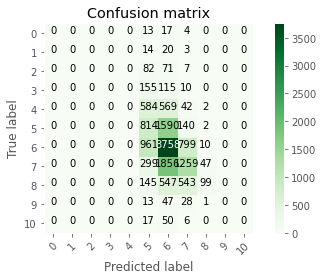

In [ ]:
# Executando os dados com o melhor modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_tree_cv = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, gs.best_estimator_)

In [ ]:
# imprimindo a importância da feature
# Quanto maior o percentual, maior a importância
features = X_train_MIMMAX.columns
features_importance = zip(resultados_MIMMAX_tree[1].feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (features, importance*100))

Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'],
      dtype='object'): 27.099110%
Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbi

In [ ]:
# Executando o crossvalidation com o melhor modelo definido pelo gridsearch e avaliando o resultado
scores_cv7 = cross_val_score(gs.best_estimator_, X_train_MIMMAX, y_train_MIMMAX, cv=7, scoring='neg_mean_squared_error')
scores_cv7

# Imprime colunas de interesse.
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_cv7.mean(), scores_cv7.std() * 2))
print ("Desvio", scores_cv7.std())

Accuracy: -1.44 (+/- 0.06)
Desvio 0.0296410823932408


In [ ]:
# Armazenando os dados
insert(metricas,['DECISION TREE REGRESSOR', 'GS + CV', resultados_MIMMAX_tree_cv[0][0],resultados_MIMMAX_tree_cv[0][1], resultados_MIMMAX_tree_cv[0][2], resultados_MIMMAX_tree_cv[0][3],resultados_MIMMAX_tree_cv[0][4],resultados_MIMMAX_tree_cv[0][5]])

# imprimindo os resultados obtidos até agora com os modelos
metricas

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
0,DECISION TREE REGRESSOR,BASELINE,1.248790,5.960995,NaN,0.876407,0.178718,0.170059
1,DECISION TREE REGRESSOR,GS + CV,0.597864,5.999477,NaN,0.891333,NaN,0.130683


# MODELO 2 - RANDOM FOREST

In [ ]:
# Criando o modelo com parâmetros padrão
rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

BASELINE RANDON FOREST do MIN-MAX





desvio: 0.8253581740500978 média: 5.972467404497208 
F1: nan Acurácia: 0.887731374399398 
Precisão: nan Revocação:  0.1426893556420682



Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide


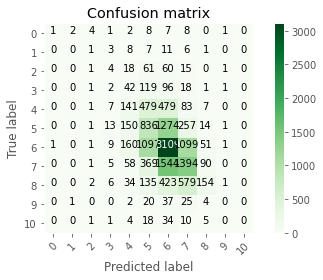

In [ ]:
# Executando o modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_rf = roda_modelo('BASELINE RANDON FOREST', 'MIN-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, rf)


In [ ]:
# imprimindo a importância da feature
# Quanto maior o percentual, maior a importância
features = X_train_MIMMAX.columns
features_importance = zip(resultados_MIMMAX_rf[1].feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (features, importance*100))

Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'],
      dtype='object'): 28.253477%
Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbi

In [ ]:
# guardando as métricas e visualizando os resultados até o momento
insert(metricas,['RANDOM FOREST REGRESSOR', 'BASELINE', resultados_MIMMAX_rf[0][0],resultados_MIMMAX_rf[0][1], resultados_MIMMAX_rf[0][2], resultados_MIMMAX_rf[0][3],resultados_MIMMAX_rf[0][4],resultados_MIMMAX_rf[0][5]])
metricas

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
0,DECISION TREE REGRESSOR,BASELINE,1.248790,5.960995,NaN,0.876407,0.178718,0.170059
1,DECISION TREE REGRESSOR,GS + CV,0.597864,5.999477,NaN,0.891333,NaN,0.130683
2,RANDOM FOREST REGRESSOR,BASELINE,0.825358,5.972467,NaN,0.887731,NaN,0.142689


In [ ]:
# Visualizando a floresta



## RANDON FOREST REGRESSOR COM GRIDSEARCH + CROSS VALIDATION

In [ ]:
# obtendo quais são os parâmetros disponíveis no randon forest, para uso no grid-search
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# PARAMETROS DO GRID SEARCH CV
parametros_grid_randomForestRegressor = {
    "n_estimators": [100, 200], # O número de árvores na floresta.  default = 100
    "max_depth": [5, None], # profundidade máxima da árvore. default = None
    "max_features": ["auto"], # número máximo de recursos considerados para dividir um nó. default = ”auto” (auto”, “sqrt”, “log2”, int ou float, ”auto”)
    "min_samples_split": [50,100], # número mínimo de amostras necessárias para dividir um nó interno. default = 2
    "min_samples_leaf": [1, 10],  # número mínimo de amostras necessárias para estar em um nó folha. default = 1
    "bootstrap": [True], # amostragem de dados.  default = True
    "random_state": [RANDOM_STATE]
}
# execução do gridsearch para definição dos melhores parâmetros
gs_randonForest = GridSearchCV(rf, param_grid=parametros_grid_randomForestRegressor, scoring='r2', cv=5)

In [ ]:
# treinando a árvore e definindo o melhor modelo
tic = time.time()
gs_randonForest.fit(X_train_MIMMAX, y_train_MIMMAX)
tac = time.time()
tempo_gasto = tac - tic
print('Melhor estimador=',gs_randonForest.best_estimator_)
print("Melhor score=",gs_randonForest.best_score_ * 100)
print ("Tempo gasto: ", tempo_gasto)

Melhor estimador= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
Melhor score= 19.77522701138906
Tempo gasto:  402.6718204021454


BASELINE RANDON FOREST do MIN-MAX





desvio: 0.6002770661446359 média: 5.993744835464045 
F1: nan Acurácia: 0.8932578378945162 
Precisão: nan Revocação:  0.13213618851570008



Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide


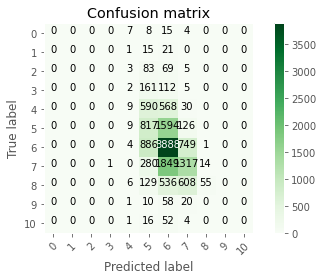

In [ ]:
# Rodando os dados com o melhor modelo, gerando os resuldos e plotando a matriz de confusão
resultados_MIMMAX_rf_cv = roda_modelo('BASELINE RANDON FOREST', 'MIN-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, gs_randonForest)

In [ ]:
# Print the feature rankingimport numpy as np

importances = resultados_MIMMAX_tree_cv[1].feature_importances_


indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
  print("%d. feature %s (%f)" % (f + 1, X_train_MIMMAX.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature qtde_votos (0.275417)
2. feature ano_lancamento (0.193256)
3. feature cod_lingua (0.176103)
4. feature documentario (0.158425)
5. feature drama (0.097680)
6. feature animacao (0.037103)
7. feature United Kingdom (pais producao) (0.016971)
8. feature musical (0.012833)
9. feature tipo_duracao (0.008238)
10. feature crime (0.006896)
11. feature romance (0.006660)
12. feature Italy (pais producao) (0.002981)
13. feature Russia (pais producao) (0.002818)
14. feature Español (0.001449)
15. feature France (pais producao) (0.001264)
16. feature Canada (pais producao).1 (0.000981)
17. feature historia (0.000489)
18. feature Français (0.000435)
19. feature Italiano (0.000000)
20. feature 日本語 (0.000000)
21. feature India (pais producao) (0.000000)
22. feature Germany (pais producao) (0.000000)
23. feature Warner Bros. (0.000000)
24. feature gerra (0.000000)
25. feature Japan (pais producao) (0.000000)
26. feature Paramount Pictures (0.000000)
27. feature Twentieth Cen

In [ ]:
# imprimindo a importância da feature
# Quanto maior o percentual, maior a importância
#features = X_train_MIMMAX.columns
#features_importance = zip(resultados_MIMMAX_tree_cv[1].feature_importances_, features)
#for importance, feature in sorted(features_importance, reverse=True):
#    print("%s: %f%%" % (features, importance*100))

In [ ]:
# Executando o crossvalidation com o melhor modelo definido pelo gridsearch e avaliando o resultado
scores_rf_cv = cross_val_score(gs_randonForest.best_estimator_, X_train_MIMMAX, y_train_MIMMAX, cv=7, scoring='neg_mean_squared_error')
scores_rf_cv

# Imprime colunas de interesse.
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf_cv.mean(), scores_rf_cv.std() * 2))
print ("Desvio", scores_rf_cv.std())

Accuracy: -1.39 (+/- 0.06)
Desvio 0.028622321690486646


In [ ]:
# Armazenando os dados
insert(metricas,['RANDOM FOREST REGRESSOR', 'GS + CV', resultados_MIMMAX_rf_cv[0][0],resultados_MIMMAX_rf_cv[0][1], resultados_MIMMAX_rf_cv[0][2], resultados_MIMMAX_rf_cv[0][3],resultados_MIMMAX_rf_cv[0][4],resultados_MIMMAX_rf_cv[0][5]])
metricas

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
0,DECISION TREE REGRESSOR,BASELINE,1.248790,5.960995,NaN,0.876407,0.178718,0.170059
1,DECISION TREE REGRESSOR,GS + CV,0.597864,5.999477,NaN,0.891333,NaN,0.130683
2,RANDOM FOREST REGRESSOR,BASELINE,0.825358,5.972467,NaN,0.887731,NaN,0.142689
3,RANDOM FOREST REGRESSOR,GS + CV,0.600277,5.993745,NaN,0.893258,NaN,0.132136


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

In [ ]:
# Visualizando os resultados
metricas

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
0,DECISION TREE REGRESSOR,BASELINE,1.248790,5.960995,NaN,0.876407,0.178718,0.170059
1,DECISION TREE REGRESSOR,GS + CV,0.597864,5.999477,NaN,0.891333,NaN,0.130683
2,RANDOM FOREST REGRESSOR,BASELINE,0.825358,5.972467,NaN,0.887731,NaN,0.142689
3,RANDOM FOREST REGRESSOR,GS + CV,0.600277,5.993745,NaN,0.893258,NaN,0.132136


Optei por usar como baseline os próprios modelos:
<br>1o) rodei os modelos com os parâmetros padrão
<br>2o) rodei o gridserach para definir o melhor modelo e validei com o crossvalidation
<br>O melhor resultado é do decision tree com gridsearchCV. 
<br>Antes dos treinos achava que o randoforest fosse melhor que a decision tree, por ser uma floresta de árvores. Mas a diferença das métricas ficou insignificante, em compensação, o tempo de execução do randoforest é muito superior. 

In [ ]:
print ('Menor desvio -> melhor modelo: ' , metricas['desvio'].min())

Menor desvio -> melhor modelo:  0.5978641067236082


In [ ]:
print('max_error:', max_error(y_test_MIMMAX, gs.best_estimator_.predict(X_test_MIMMAX)))
print ('mean_absolute_error', mean_absolute_error(y_test_MIMMAX, gs.best_estimator_.predict(X_test_MIMMAX)))
print ('mean_squared_error', mean_squared_error(y_test_MIMMAX, gs.best_estimator_.predict(X_test_MIMMAX)))
print ('r2_score', r2_score(y_test_MIMMAX, gs.best_estimator_.predict(X_test_MIMMAX)))

max_error: 7.203703703703703
mean_absolute_error 0.8730721763482696
mean_squared_error 1.433844913113583
r2_score 0.1656098141780349


In [ ]:
metricas[metricas['desvio'] == metricas['desvio'].min()]

,nome_modelo,tipo_predicao,desvio,media,F1_score,accuracia,precisao,revogacao
1,DECISION TREE REGRESSOR,GS + CV,0.597864,5.999477,NaN,0.891333,NaN,0.130683


*** Visualizando a predição do decision tree com os parâmetros definidos pelo gridsearchCV

GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE do MIM-MAX





desvio: 0.5978641067236082 média: 5.999477226427323 
F1: nan Acurácia: 0.8913334443560376 
Precisão: nan Revocação:  0.13068269646059918



Confusion matrix, without normalization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


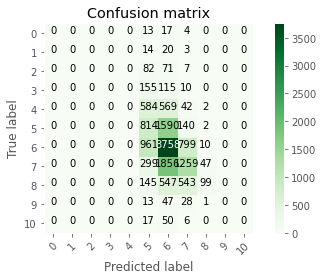

In [ ]:
# Visualizando os resultados novamente
tree_final = roda_modelo('GRIDSEARCHCV + CROSSVALIDATION - DECISION TREE', 'MIM-MAX', X_train_MIMMAX, y_train_MIMMAX, X_test_MIMMAX, y_test_MIMMAX, gs.best_estimator_)

Observamos que a maior parte dos erros na predição estão concentrados nos labes 5, 6 e 7, sendo estes também os mais frequentes no dataset. Há necessidade de ainda tentar melhorar a predição destes targets.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*

As três hipóteses se concretizaram:

Hipótese 1 - As maiores média de votos está relacionada a algum genero específico? O gênero que possui a maior média de votos é o Drama, seja isolado, seja em conjunto com outros gêneros. Dos 10 maiores, o Drama está presente em 6.

Hipótese 2 - As maiores média de votos está relacionada a algum idioma original? De todos os idiomas, o inglês é o mais frequente, 70%.

Hipótese 3 - As maiores média de votos está relacionada a algum cia de produção? A companhia com as maiores médias de votos é a Warner, com 1186.

Concluí também que o idioma não é um fator relevante uma vez que o inglês corresponde a 70% da base.
Os gêneros parecem não tiveram muita relevancia, uma vez que a correlação deles com as demais features ficou ruim. Uma tentativa seria agrupar os gêneros.

Apesar de ter conseguindo uma melhora na predição das médias de votos, os valores do desvio e acurácia tem que ser melhorados, principalmente, tentar identificar porque há uma grande quantidade de erros na predição de média 6 e 7.